# Funnel Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
plt.style.use('ggplot')

In [3]:
user = pd.read_csv('user_table.csv')
search = pd.read_csv('search_page_table.csv')
payment = pd.read_csv('payment_page_table.csv')
confirm = pd.read_csv('payment_confirmation_table.csv')
home = pd.read_csv('home_page_table.csv')

In [15]:
user1 = user.merge(home,on = 'user_id',how = 'left')
user1=user1.rename(columns = {'page':'home'})

In [16]:
user1.head()

,user_id,date,device,sex,home
0,450007,2015-02-28,Desktop,Female,home_page
1,756838,2015-01-13,Desktop,Male,home_page
2,568983,2015-04-09,Desktop,Male,home_page
3,190794,2015-02-18,Desktop,Female,home_page
4,537909,2015-01-15,Desktop,Male,home_page


In [17]:
user2 = user1.merge(search,on = 'user_id',how = 'left' )
user2=user2.rename(columns = {'page':'search'})

In [18]:
user2.head()

,user_id,date,device,sex,home,search
0,450007,2015-02-28,Desktop,Female,home_page,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page
3,190794,2015-02-18,Desktop,Female,home_page,search_page
4,537909,2015-01-15,Desktop,Male,home_page,NaN


In [19]:
user3 = user2.merge(payment,on = 'user_id',how = 'left' )
user3=user3.rename(columns = {'page':'payment'})

In [255]:
user4 = user3.merge(confirm,on = 'user_id',how = 'left' )
user4=user4.rename(columns = {'page':'confirm'})

In [21]:
user4.head()

,user_id,date,device,sex,home,search,payment,confirm
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [22]:
user4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id    90400 non-null int64
date       90400 non-null object
device     90400 non-null object
sex        90400 non-null object
home       90400 non-null object
search     45200 non-null object
payment    6030 non-null object
confirm    452 non-null object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


In [25]:
desktop = user4[user4['device']=='Desktop']

In [26]:
mobile = user4[user4['device']=='Mobile']

In [27]:
desktop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60200 entries, 0 to 90398
Data columns (total 8 columns):
user_id    60200 non-null int64
date       60200 non-null object
device     60200 non-null object
sex        60200 non-null object
home       60200 non-null object
search     30100 non-null object
payment    3010 non-null object
confirm    150 non-null object
dtypes: int64(1), object(7)
memory usage: 4.1+ MB


In [28]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30200 entries, 7 to 90399
Data columns (total 8 columns):
user_id    30200 non-null int64
date       30200 non-null object
device     30200 non-null object
sex        30200 non-null object
home       30200 non-null object
search     15100 non-null object
payment    3020 non-null object
confirm    302 non-null object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [189]:
mobile_funnel = mobile.count()
desktop_funnel = desktop.count()

In [190]:
mobile_funnel  = mobile_funnel[['home','search','payment','confirm']]
desktop_funnel  = desktop_funnel[['home','search','payment','confirm']]

In [191]:
mobile_funnel = mobile_funnel.rename_axis(['Page'])
desktop_funnel = desktop_funnel.rename_axis(['Page'])

In [192]:
mobile_funnel = mobile_funnel.reset_index()
desktop_funnel = desktop_funnel.reset_index()

In [193]:
desktop_funnel

,Page,0
0,home,60200
1,search,30100
2,payment,3010
3,confirm,150


In [194]:
mobile_funnel = mobile_funnel.rename(columns = {mobile_funnel.columns[1]: "Conversion"})
desktop_funnel = desktop_funnel.rename(columns = {desktop_funnel.columns[1]: "Conversion"})

In [195]:
rate = []
for ind, row in mobile_funnel.iterrows():
    data =  float(row['Conversion'])/30200*100
    rate.append(data)

mobile_funnel['rate'] = rate

In [196]:
rate = []
for ind, row in desktop_funnel.iterrows():
    data =  float(row['Conversion'])/60200*100
    rate.append(data)

desktop_funnel['rate'] = rate
desktop_funnel['rate'] = desktop_funnel['rate'].round(1)

In [197]:
mobile_funnel['rate_per']= mobile_funnel.rate.astype(str) + '%'
desktop_funnel['rate_per']= desktop_funnel.rate.astype(str) + '%'

In [200]:
name1 = mobile_funnel.rate_per
name2 = desktop_funnel.rate_per

In [201]:
def autolabel(rects,name):
# attach some text labels
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%s'% (name[ii]),
                ha='center', va='bottom')


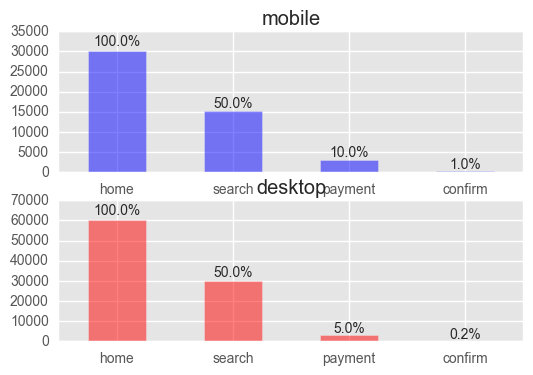

In [202]:
objects = mobile_funnel.Page
y_pos = np.arange(len(objects))
con1 = mobile_funnel.Conversion
con2 = desktop_funnel.Conversion

plt.subplot(2,1,1)
bar1 = plt.bar(y_pos, con1, align='center', alpha=0.5, color = 'b',width = 0.5)
autolabel(bar1,name1)
plt.xticks(y_pos, objects)
plt.title('mobile')

plt.subplot(2,1,2)
bar2 = plt.bar(y_pos, con2, align='center', alpha=0.5, color = 'r',width = 0.5)
plt.xticks(y_pos, objects)
autolabel(bar2,name2)
plt.title('desktop')

plt.show()

In [256]:
user4.head()

,user_id,date,device,sex,home,search,payment,confirm
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [257]:
user4['date'] = pd.to_datetime(user4['date'])

In [258]:
user4['year'], user4['month'],user4['day'] = user4['date'].dt.year, user4['date'].dt.month,user4['date'].dt.day

In [259]:
user4.head()

,user_id,date,device,sex,home,search,payment,confirm,year,month,day
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN,2015,2,28
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN,2015,1,13
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN,2015,4,9
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN,2015,2,18
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN,2015,1,15


In [261]:
def conversion(row):
    if ((pd.notnull(row['home'])== True)&(pd.notnull(row['search'])==False)):
        return 'exit_home'
    elif ((pd.notnull(row['home'])== True)&(pd.notnull(row['search'])==True)
                                      &(pd.notnull(row['payment'])==False)):
        return 'exit_search'
    elif ((pd.notnull(row['home'])== True)&(pd.notnull(row['search'])==True)
                                      &(pd.notnull(row['payment'])==True)
                                       &(pd.notnull(row['confirm'])==False)):
        return 'exit_payment'
    elif ((pd.notnull(row['home'])== True)&(pd.notnull(row['search'])==True)
                                      &(pd.notnull(row['payment'])==True)
                                       &(pd.notnull(row['confirm'])==True)):
                                        
        return 'exit_confirm'
    else:
        return 'no idea'
    
                                         


In [262]:
user4['conversion']=user4.apply(lambda row: conversion(row),axis = 1)

In [263]:
user4.conversion.unique()

array(['exit_home', 'exit_search', 'exit_payment', 'exit_confirm'], dtype=object)

In [264]:
user4.head()

,user_id,date,device,sex,home,search,payment,confirm,year,month,day,conversion
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN,2015,2,28,exit_home
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN,2015,1,13,exit_home
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN,2015,4,9,exit_search
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN,2015,2,18,exit_search
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN,2015,1,15,exit_home


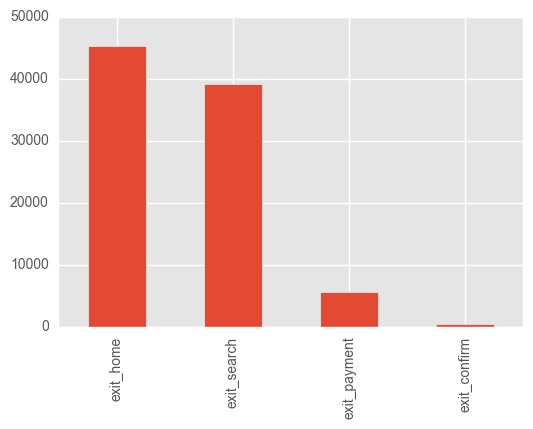

In [289]:
user4.conversion.value_counts().plot(kind = 'bar')

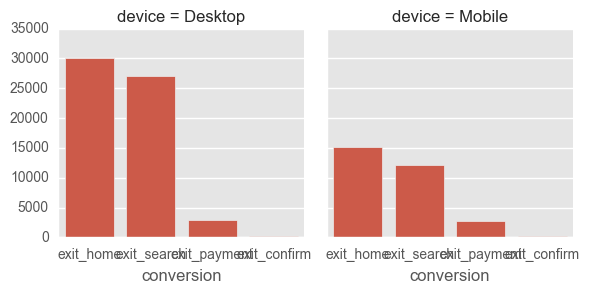

In [265]:

sns.FacetGrid(user4, col='device').map(sns.countplot,'conversion')

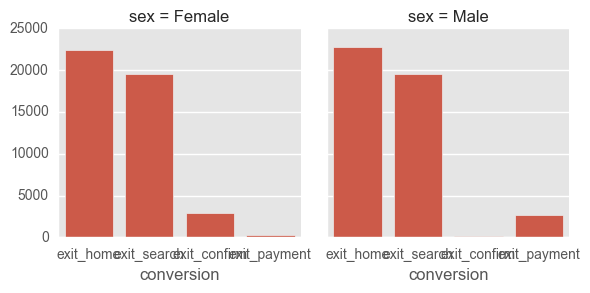

In [267]:

sns.FacetGrid(user4, col='sex').map(sns.countplot,'conversion')

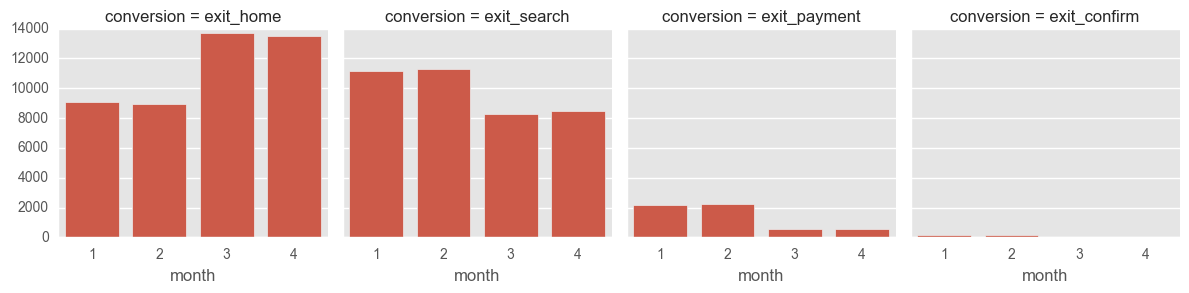

In [270]:

sns.FacetGrid(user4, col='conversion').map(sns.countplot,'month')

In [271]:
df_exit = pd.get_dummies(user4.conversion)
user5 = pd.concat([user4,df_exit],axis = 1)
user5.head()

,user_id,date,device,sex,home,search,payment,confirm,year,month,day,conversion,exit_confirm,exit_home,exit_payment,exit_search
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN,2015,2,28,exit_home,0,1,0,0
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN,2015,1,13,exit_home,0,1,0,0
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN,2015,4,9,exit_search,0,0,0,1
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN,2015,2,18,exit_search,0,0,0,1
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN,2015,1,15,exit_home,0,1,0,0


In [277]:
user5['gender'] = user5['sex'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [278]:
user5['devices'] = user5['device'].map( {'Desktop': 0, 'Mobile': 1} ).astype(int)

In [279]:
user5.head()

,user_id,date,device,sex,home,search,payment,confirm,year,month,day,conversion,exit_confirm,exit_home,exit_payment,exit_search,gender,devices
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN,2015,2,28,exit_home,0,1,0,0,0,0
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN,2015,1,13,exit_home,0,1,0,0,1,0
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN,2015,4,9,exit_search,0,0,0,1,1,0
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN,2015,2,18,exit_search,0,0,0,1,0,0
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN,2015,1,15,exit_home,0,1,0,0,1,0


## Build model to find out what result in exit for each page

In [280]:
X = user5[['devices','gender','month','day']]
y_home = user5['exit_home']
y_search = user5['exit_search']
y_payment = user5['exit_payment']
y_confirm = user5['exit_confirm']

In [281]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

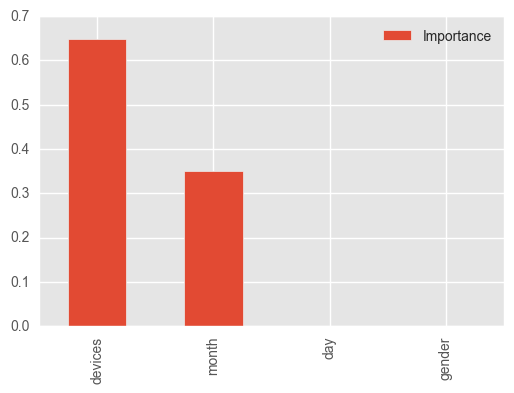

In [294]:
dec_home = DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=6)
dec_home.fit(X,y_home)
importance = dec_home.feature_importances_
feature_names = X.columns.values 
df1 = pd.DataFrame(importance,columns=['Importance'],index = feature_names)
df1 = df1.sort_values(['Importance'],ascending=False)
df1.plot(kind = 'bar')

In [295]:
from sklearn.externals import joblib
joblib.dump(dec_home, 'dec_home.pkl')

['dec_home.pkl']

In [296]:
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.externals import joblib
dec_home = joblib.load('dec_home.pkl')

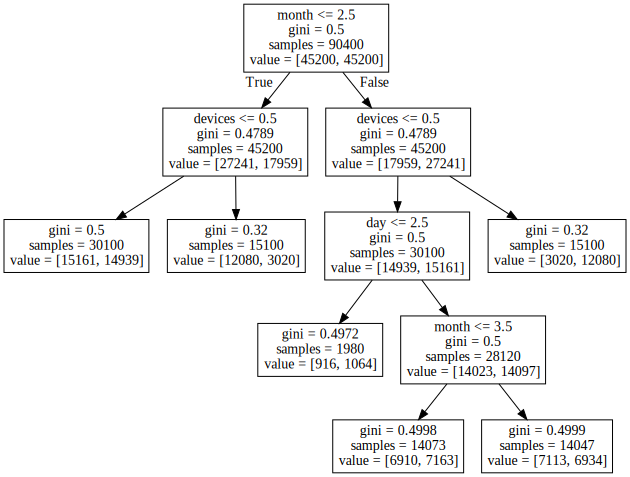

In [297]:

Source(export_graphviz(dec_home, out_file=None, feature_names=X.columns))

['dec_search.pkl']

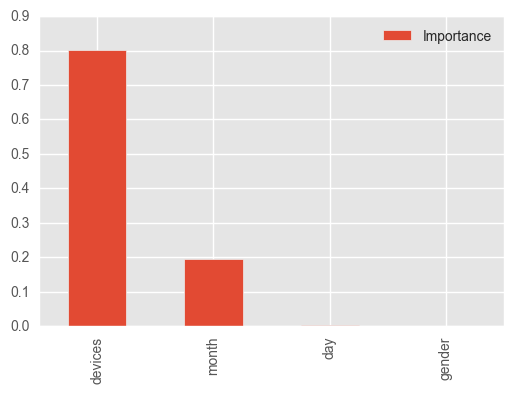

In [301]:
dec_search = DecisionTreeClassifier(max_depth=6, min_samples_split=2, max_leaf_nodes=10)
dec_search.fit(X,y_search)
importance = dec_search.feature_importances_
feature_names = X.columns.values 
df1 = pd.DataFrame(importance,columns=['Importance'],index = feature_names)
df1 = df1.sort_values(['Importance'],ascending=False)
df1.plot(kind = 'bar')
joblib.dump(dec_search, 'dec_search.pkl')

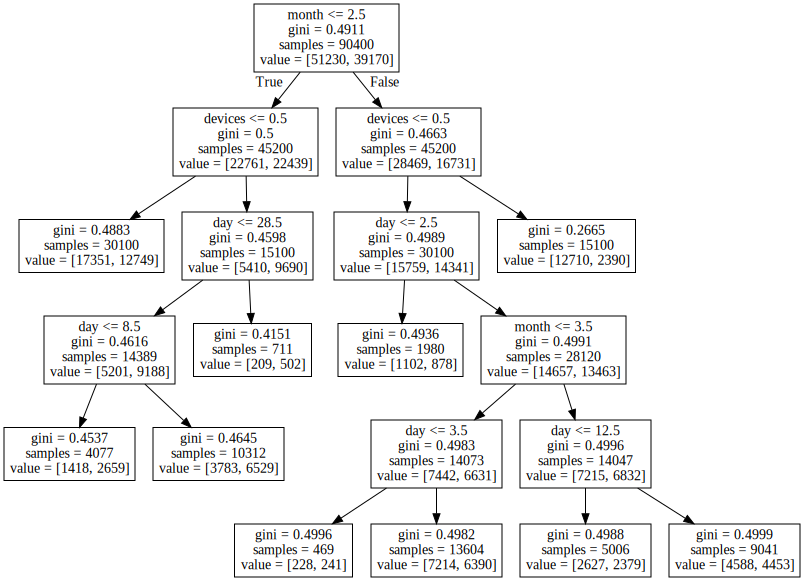

In [302]:
Source(export_graphviz(dec_search, out_file=None, feature_names=X.columns))

['dec_payment.pkl']

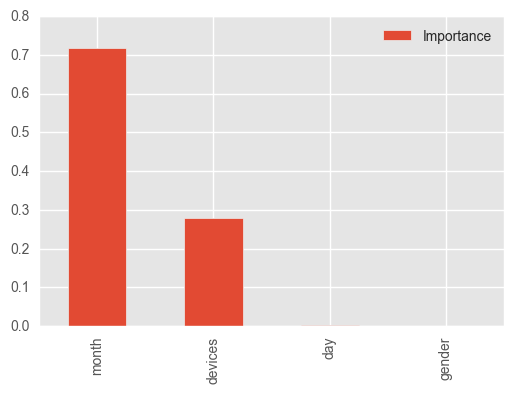

In [307]:
dec_payment = DecisionTreeClassifier(max_depth=6, min_samples_split=2, max_leaf_nodes=6)
dec_payment.fit(X,y_payment)
importance = dec_payment.feature_importances_
feature_names = X.columns.values 
df1 = pd.DataFrame(importance,columns=['Importance'],index = feature_names)
df1 = df1.sort_values(['Importance'],ascending=False)
df1.plot(kind = 'bar')
joblib.dump(dec_payment, 'dec_payment.pkl')

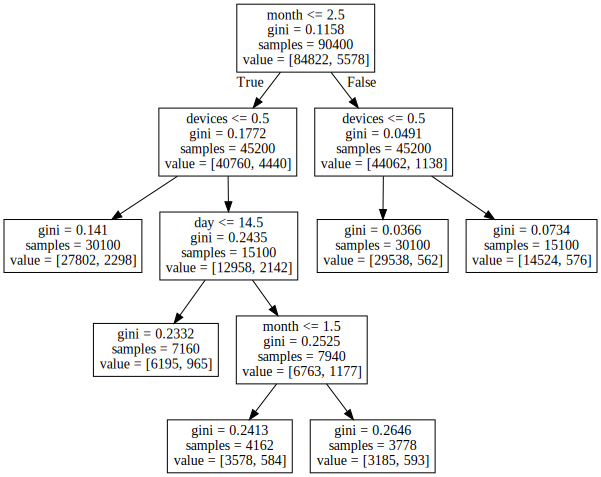

In [308]:
Source(export_graphviz(dec_payment, out_file=None, feature_names=X.columns))

['dec_confirm.pkl']

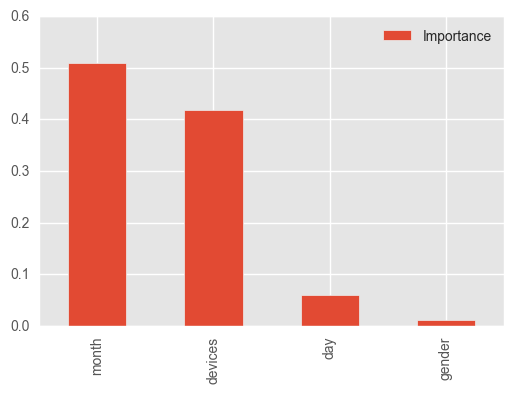

In [311]:
dec_confirm = DecisionTreeClassifier(max_depth=6, min_samples_split=2, max_leaf_nodes=10)
dec_confirm.fit(X,y_confirm)
importance = dec_confirm.feature_importances_
feature_names = X.columns.values 
df1 = pd.DataFrame(importance,columns=['Importance'],index = feature_names)
df1 = df1.sort_values(['Importance'],ascending=False)
df1.plot(kind = 'bar')
joblib.dump(dec_confirm, 'dec_confirm.pkl')

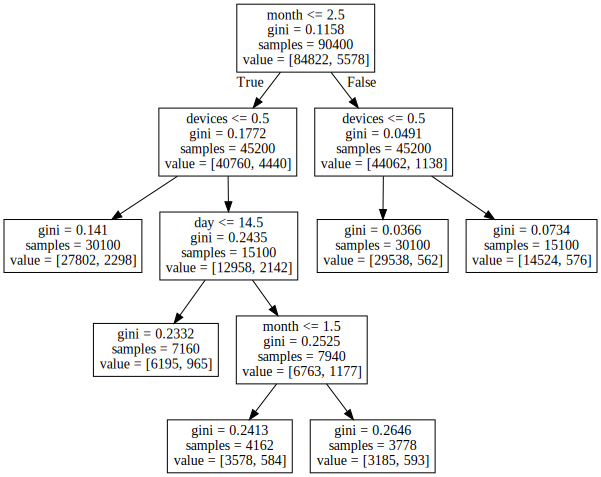

In [312]:
Source(export_graphviz(dec_payment, out_file=None, feature_names=X.columns))